### Checking Chrome Driver

In [1]:
## installing Chrome Driver
from webdriver_manager.chrome import ChromeDriverManager
ChromeDriverManager().install();

## Importing Universal Libraries

In [2]:
import pandas as pd

## Reading Dataset

In [3]:
df = pd.read_csv('data/task2.csv')

## Showing Information around the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


## Cleansing Dataset of Duplicates and NANs

In [5]:
cleansed_df = df.drop_duplicates()
cleansed_df = cleansed_df.dropna()

In [6]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 591.1+ KB


## Extracting All Currencies in the Dataset

In [7]:
value_counts = cleansed_df.groupby('Salary_Currency').size()
value_counts = value_counts.reset_index()
value_counts.columns = ['Salary_Currency', 'Count']
value_counts

,Salary_Currency,Count
0,AUD,12
1,BRL,4
2,CAD,48
3,CHF,6
4,CLP,1
5,DKK,3
6,EUR,339
7,GBP,410
8,HKD,1
9,HUF,3


## Dropping Entries with Minor Currencies

In [8]:
filter_indexes = cleansed_df['Salary_Currency'].isin(value_counts[value_counts['Count'] >= 10]['Salary_Currency'])
filtered_df = cleansed_df[filter_indexes]
filtered_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [9]:
filtered_df['Salary_Currency'].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

## Adding a Column to the Dataset Regarding Salaries in USD

In [10]:
from task2.currency import find_exchange_rate

exchange_rates = {}
for currency in filtered_df['Salary_Currency'].unique():
    exchange_rates[currency] = find_exchange_rate(currency)

In [11]:
exchange_rates

{'USD': 1, 'EUR': 1.08, 'GBP': 1.26, 'CAD': 0.74, 'AUD': 0.66, 'INR': 0.012}

In [12]:
filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(
    lambda entry: exchange_rates[entry['Salary_Currency']] * entry['Salary'],
    axis=1)
filtered_df[filtered_df['Salary_Currency'] != 'USD']

/tmp/ipykernel_100749/710950449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(


,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
29,2024,Entry-Level,Full-Time,Data Analyst,39600,EUR,0,Medium,42768.00
30,2024,Entry-Level,Full-Time,Data Analyst,33600,EUR,0,Medium,36288.00
143,2024,Senior-Level,Full-Time,Data Quality Analyst,80000,GBP,0,Medium,100800.00
144,2024,Senior-Level,Full-Time,Data Quality Analyst,45000,GBP,0,Medium,56700.00
243,2023,Entry-Level,Full-Time,Data DevOps Engineer,44382,EUR,50,Large,47932.56
...,...,...,...,...,...,...,...,...,...
13952,2021,Mid-Level,Full-Time,Lead Data Analyst,1450000,INR,100,Large,17400.00
13956,2021,Mid-Level,Full-Time,Data Engineer,38400,EUR,100,Large,41472.00
13961,2020,Senior-Level,Full-Time,Machine Learning Engineer,40000,EUR,100,S,43200.00
13965,2021,Mid-Level,Full-Time,Data Engineer,24000,EUR,50,Large,25920.00


## Visualizations

In all histograms, a normal and a log-normal approximation is provided.

In [13]:
from task2.plot import *

In [14]:
finalized_df = filtered_df
n_bins = 10
n_cols = 3

### Histogram of All Salaries

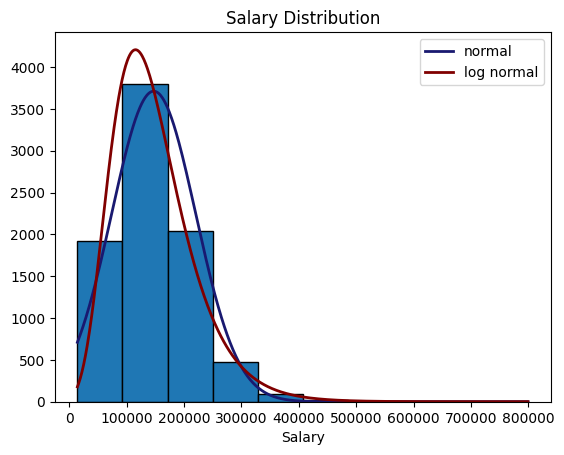

In [15]:
data = finalized_df['Salary_in_USD']
xmin, xmax = data.min(), data.max()
plt.figure()
plt.hist(data, bins=n_bins, edgecolor='black')
plot_fitted_normal(data, n_bins)
plot_fitted_lognormal(data, n_bins)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.grid(False)
plt.legend()
plt.show()

As it is apparent, log-normal approximation is more accurate at guessing the bin heights. Generally, log-normal distribution is good for data corresponding money, especially when it is about income.

### Violin Plot of All Salaries

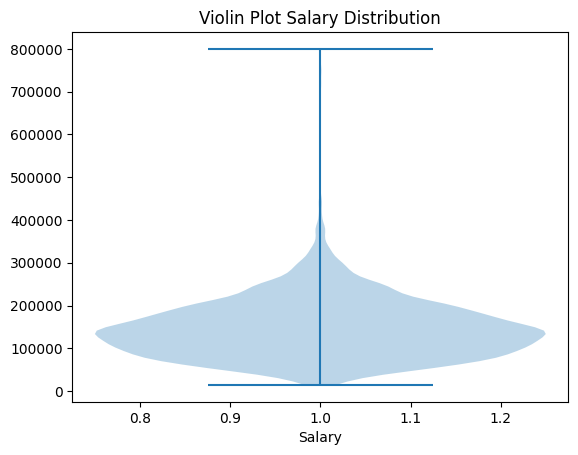

In [16]:
plt.figure()
plt.violinplot(finalized_df['Salary_in_USD'])
plt.title('Violin Plot Salary Distribution')
plt.xlabel('Salary')
plt.grid(False)
plt.show()

### 10 Most Popular Job Titles

10 most popular job titles are listed below.

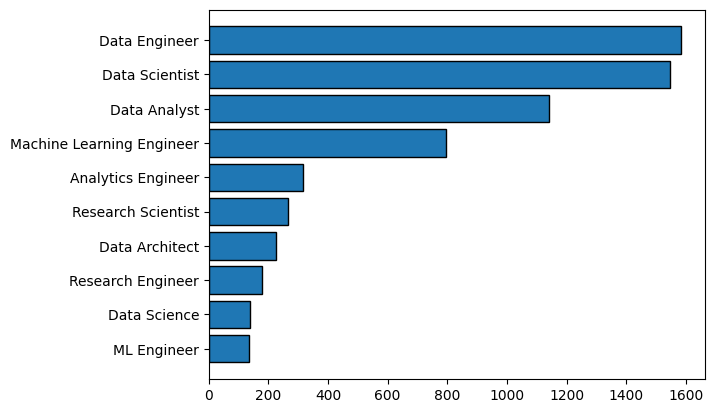

In [17]:
data = finalized_df['Job_Title'].value_counts().sort_values(ascending=False)[:10]
data = data[::-1]
plt.barh(data.index, data, edgecolor='black')
plt.show()

### Top 10 Highest Salaries
Top ten highest salaries and the entry corresponding to them are listed below.

In [18]:
finalized_df.sort_values(ascending=False, by='Salary_in_USD')[:10]

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
242,2024,Mid-Level,Full-Time,AI Architect,800000,USD,100,Medium,800000.0
1085,2024,Entry-Level,Full-Time,Data Analyst,774000,USD,0,Medium,774000.0
2060,2024,Mid-Level,Full-Time,Machine Learning Scientist,750000,USD,0,Medium,750000.0
2471,2024,Senior-Level,Full-Time,Data Analyst,750000,USD,0,Medium,750000.0
4828,2023,Mid-Level,Full-Time,Data Engineer,750000,USD,0,Medium,750000.0
3850,2023,Mid-Level,Full-Time,Machine Learning Engineer,750000,USD,0,Medium,750000.0
1884,2024,Senior-Level,Full-Time,Analytics Engineer,750000,USD,0,Medium,750000.0
4936,2023,Senior-Level,Full-Time,Data Scientist,750000,USD,0,Medium,750000.0
3844,2023,Mid-Level,Full-Time,Machine Learning Scientist,750000,USD,0,Medium,750000.0
3276,2024,Mid-Level,Full-Time,Research Engineer,720000,USD,0,Medium,720000.0


### Analysis of Experience Level

#### Histograms

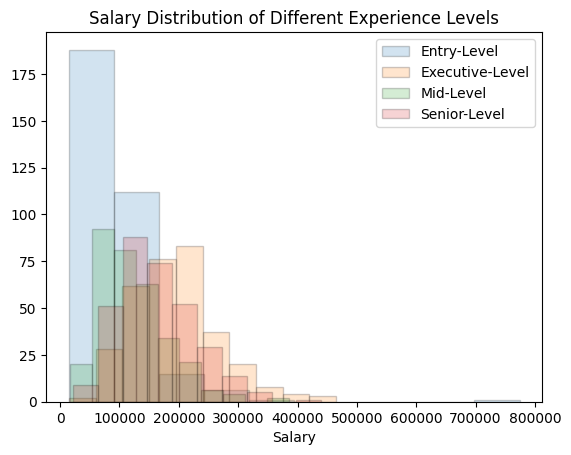

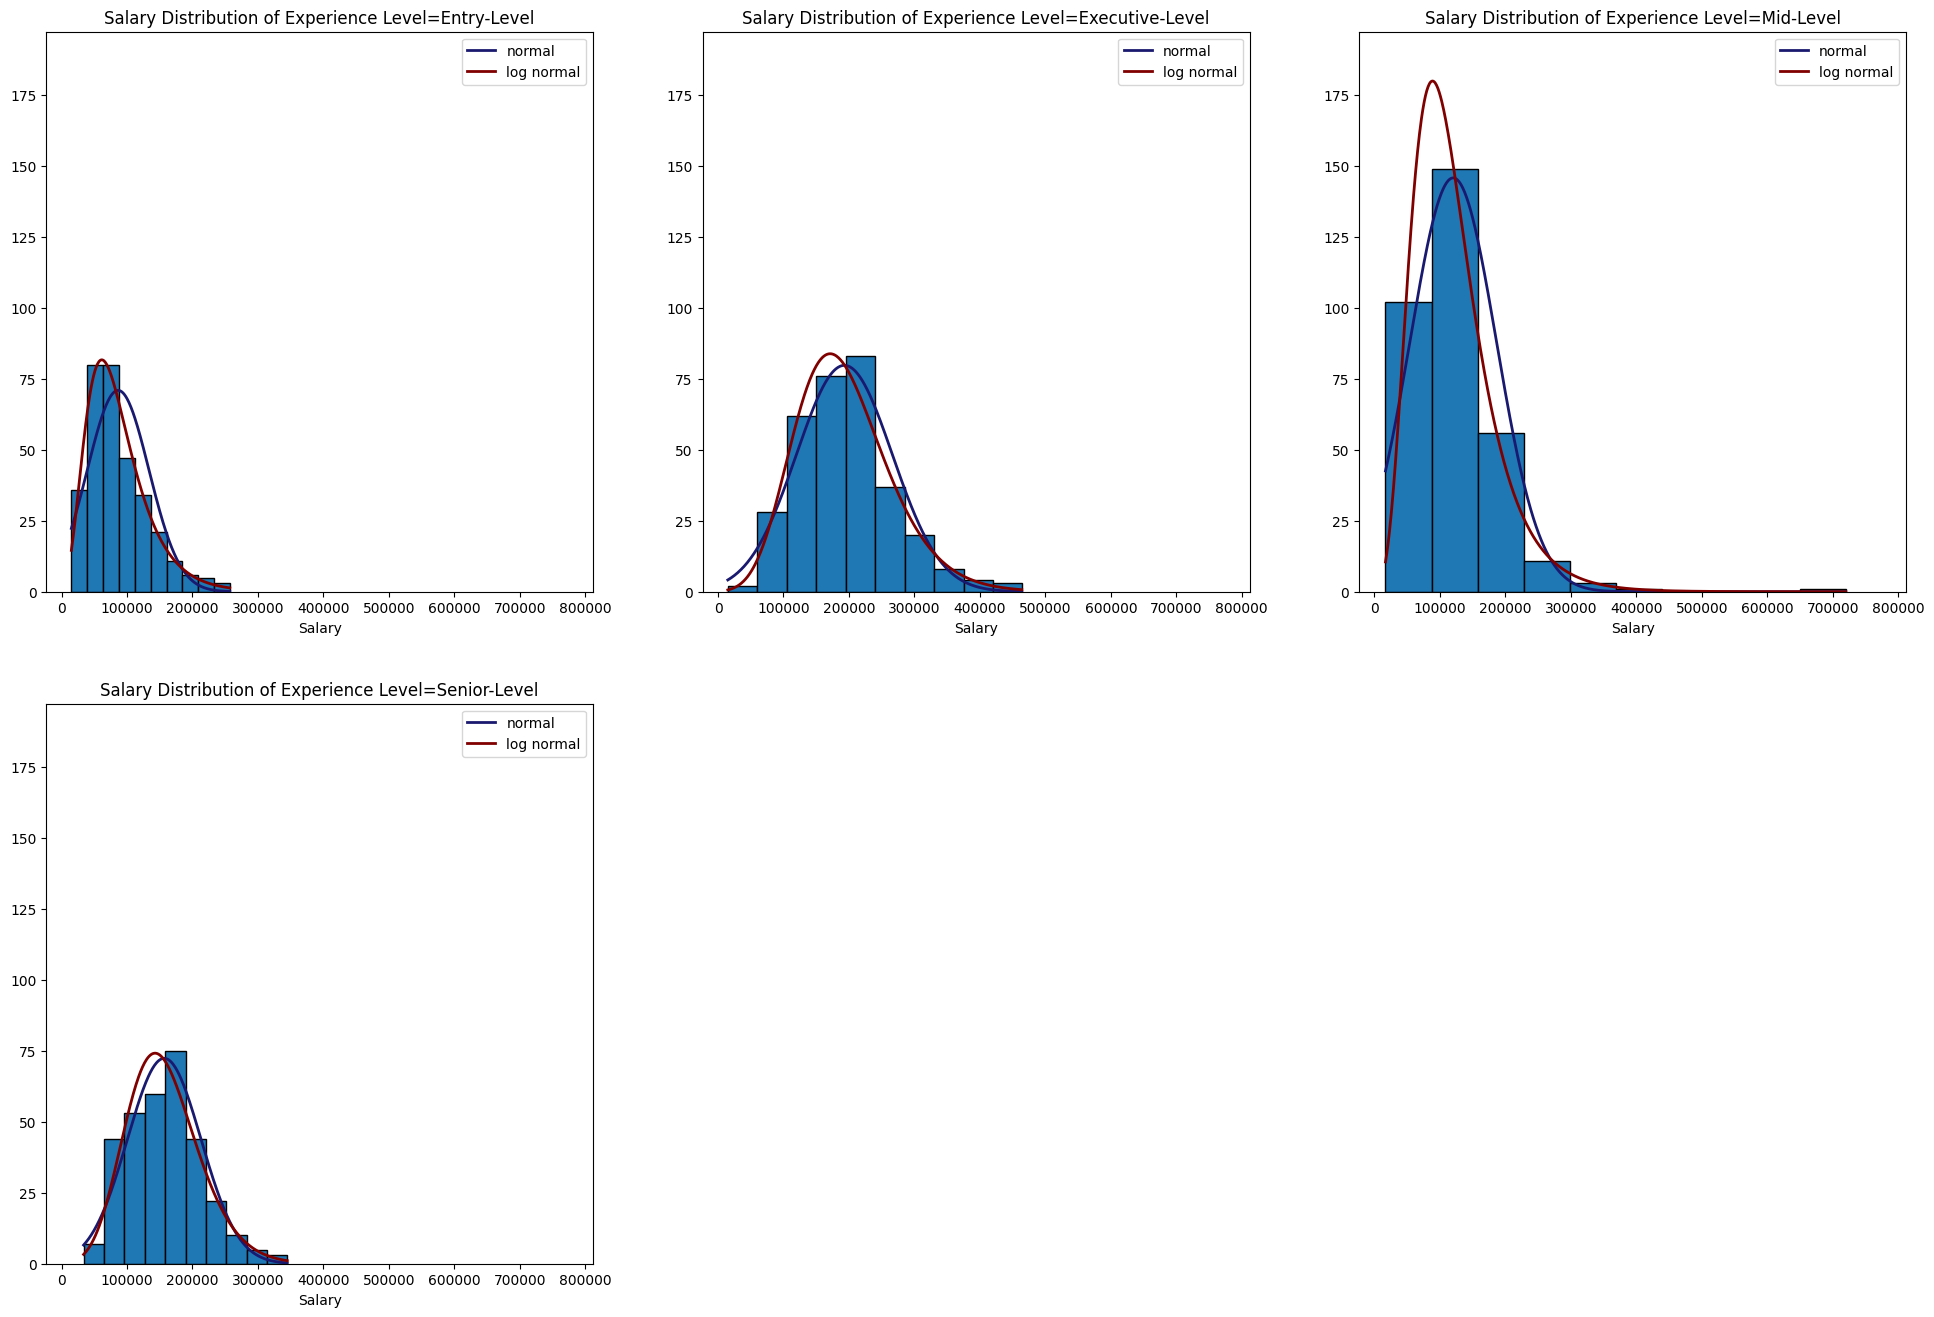

In [19]:
do_histograms(finalized_df, grouping_column='Experience_Level', n_bins=n_bins, n_cols=n_cols, full=False)

In [20]:
finalized_df['Experience_Level'].value_counts()

Experience_Level
Senior-Level       5010
Mid-Level          2234
Entry-Level         793
Executive-Level     323
Name: count, dtype: int64

It is evident that in all histograms provided in this notebook, they are far close to the log-normal approximation and the nature of their data won't change by grouping. 

#### Violin Plots

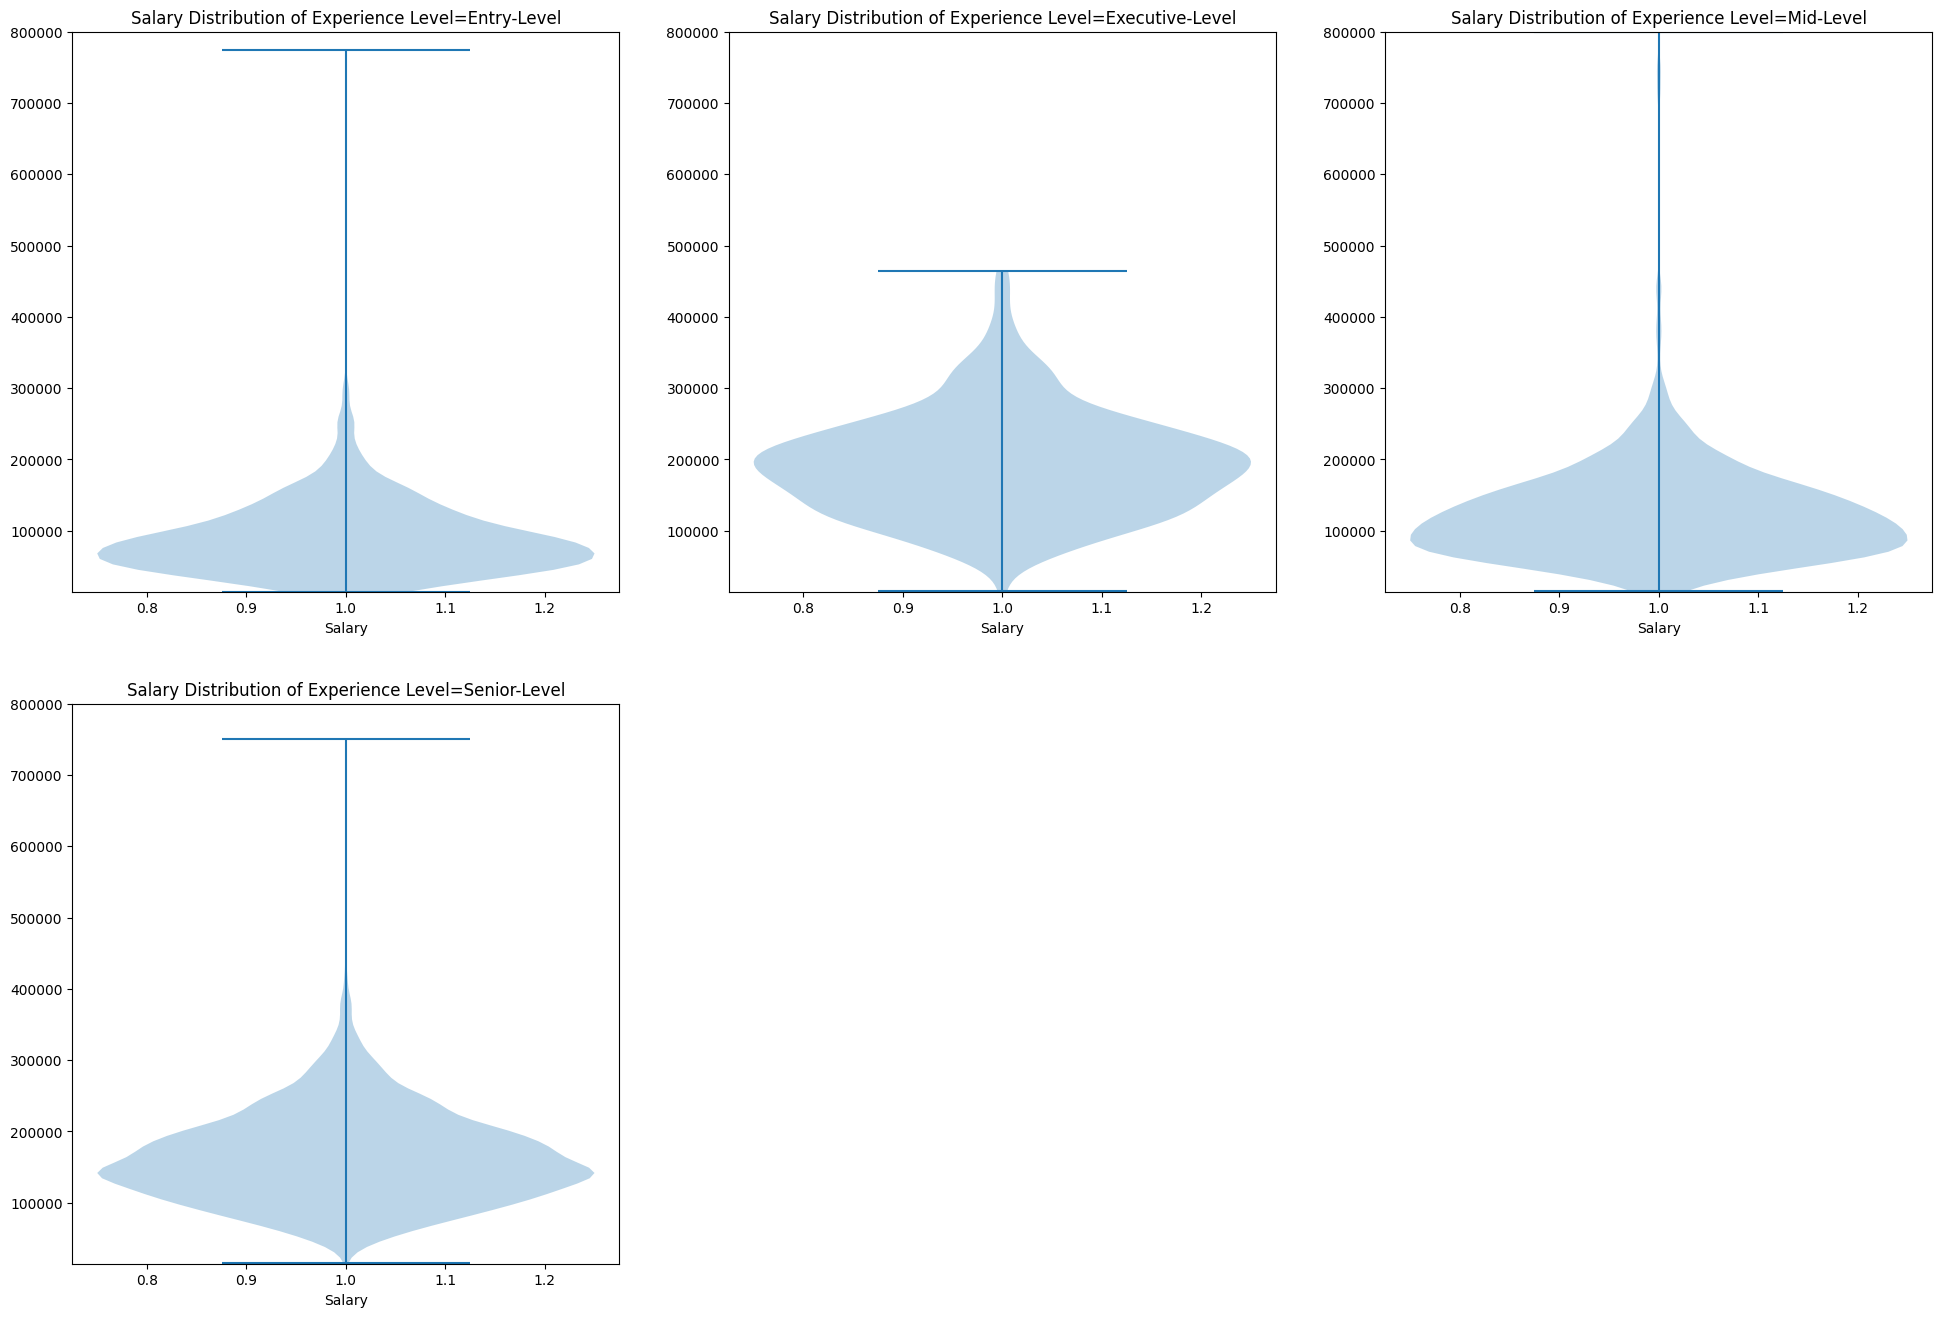

In [21]:
do_violin_plots(finalized_df, grouping_column='Experience_Level', n_cols=n_cols)

Every thing is in common mode in all these violin plots. Also, it can be seen that based on the experience level, there is a consistent pattern for the salary as it follows:
$$ Executive\ Level > Senior\ Level > Mid\ Level > Entry\ Level $$

#### Quantile Plot

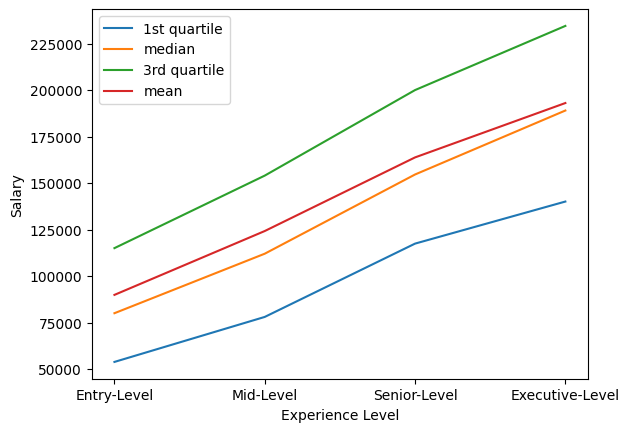

In [22]:
do_quantile_plot(finalized_df, grouping_column='Experience_Level', ordered_values=np.array(['Entry-Level',
                                                                                            'Mid-Level',
                                                                                            'Senior-Level',
                                                                                            'Executive-Level']))

Based on this quantile plot, it is clear that the level of experience has almost a linear impact on the salary, which will persist.

### Analysis of Different Work Years 

#### Histograms

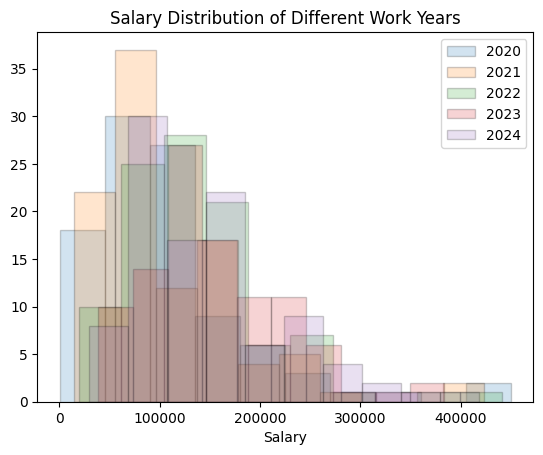

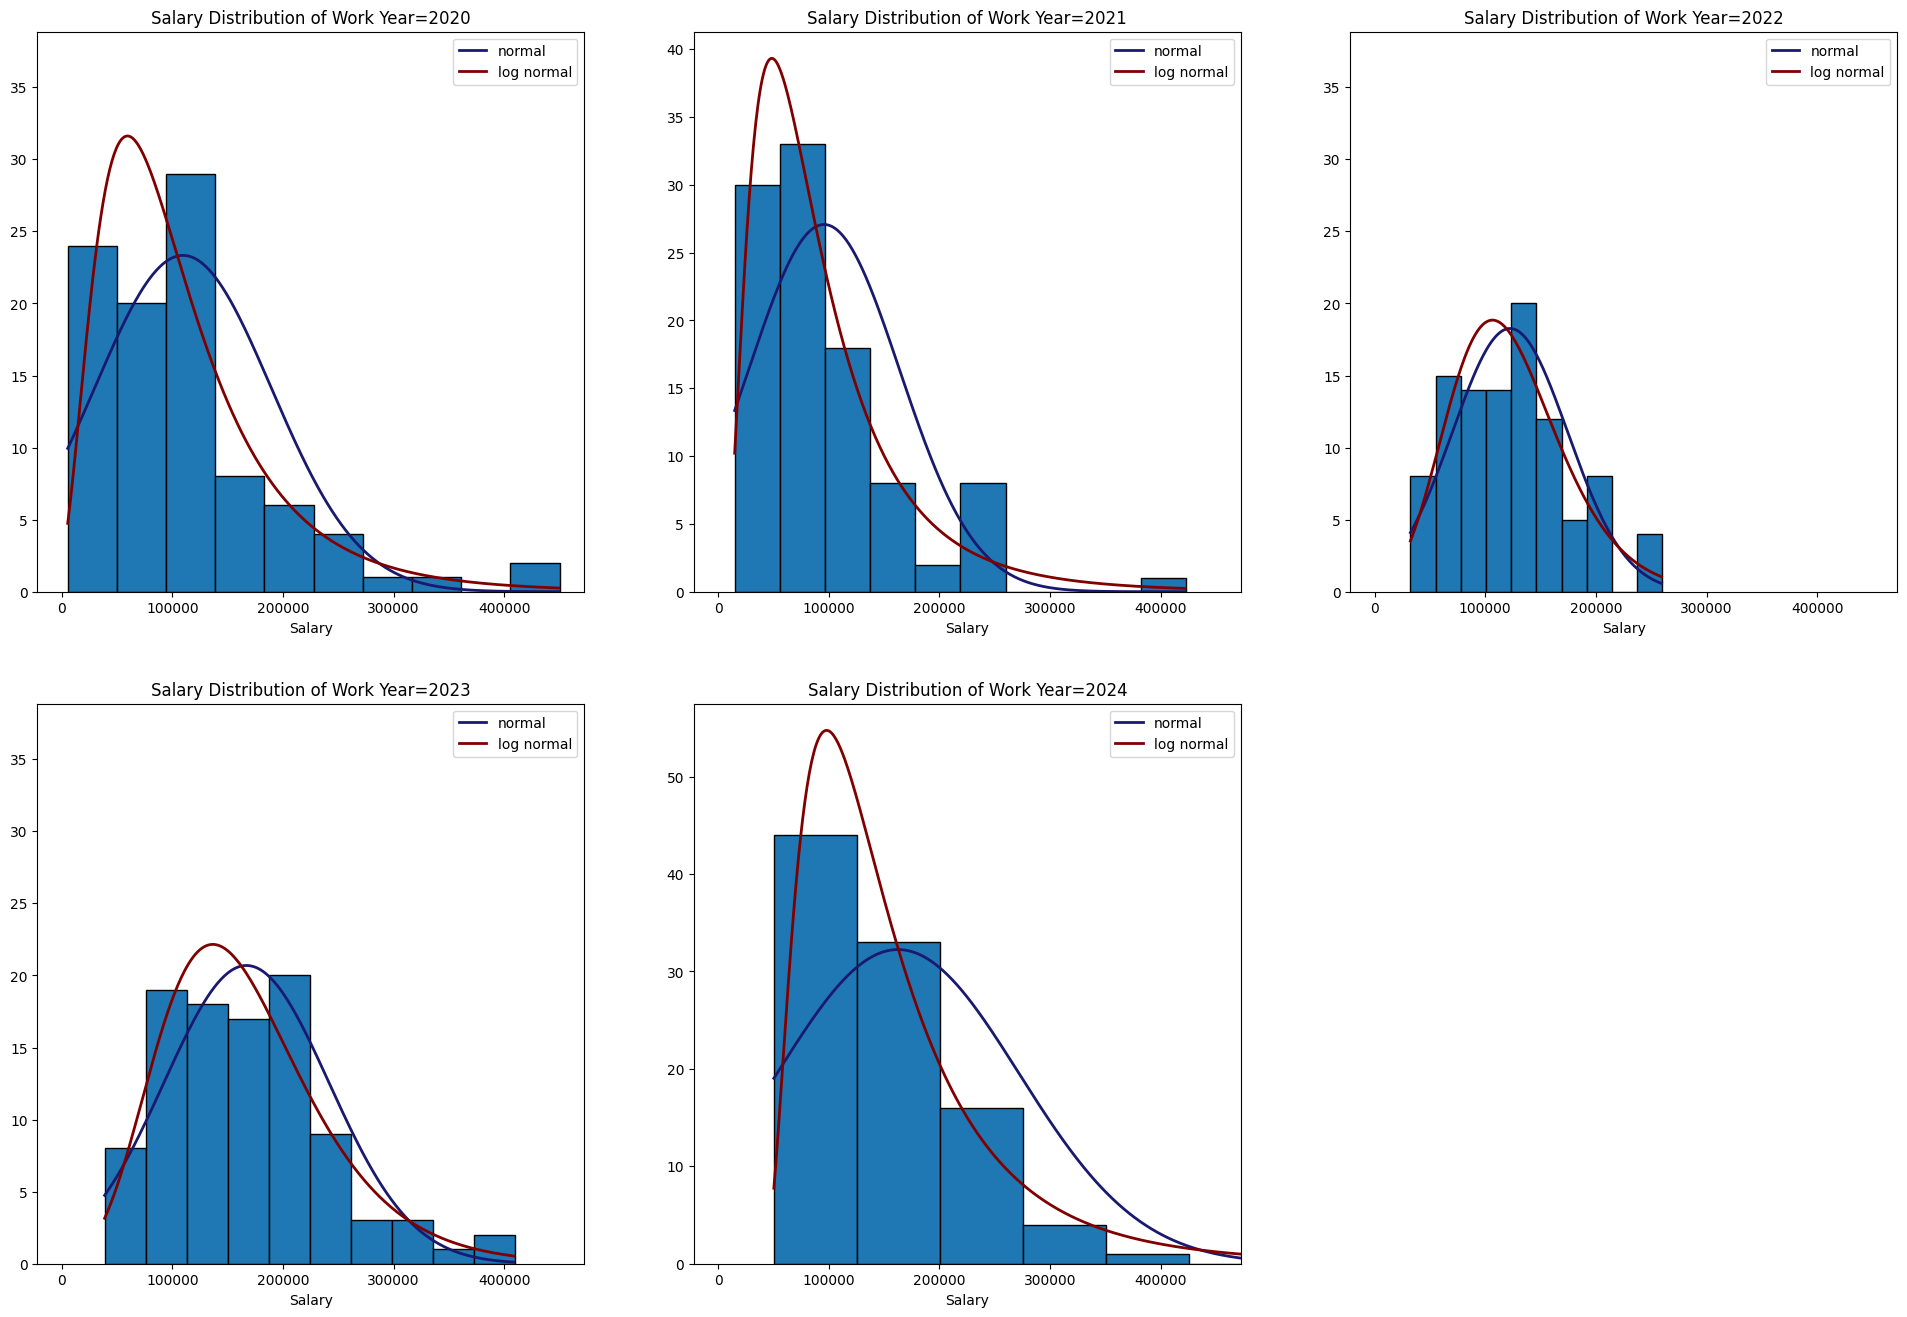

In [23]:
do_histograms(finalized_df, grouping_column='Work_Year', n_bins=n_bins, n_cols=n_cols, full=False)

In [24]:
finalized_df['Work_Year'].value_counts()

Work_Year
2023    4486
2024    2512
2022    1089
2021     202
2020      71
Name: count, dtype: int64

It is obvious that for some work years there is not as much data as there is of others. Thus, our interpretation would be rather biased. But it is not going to be that far-fetched. 

### Violin Plots

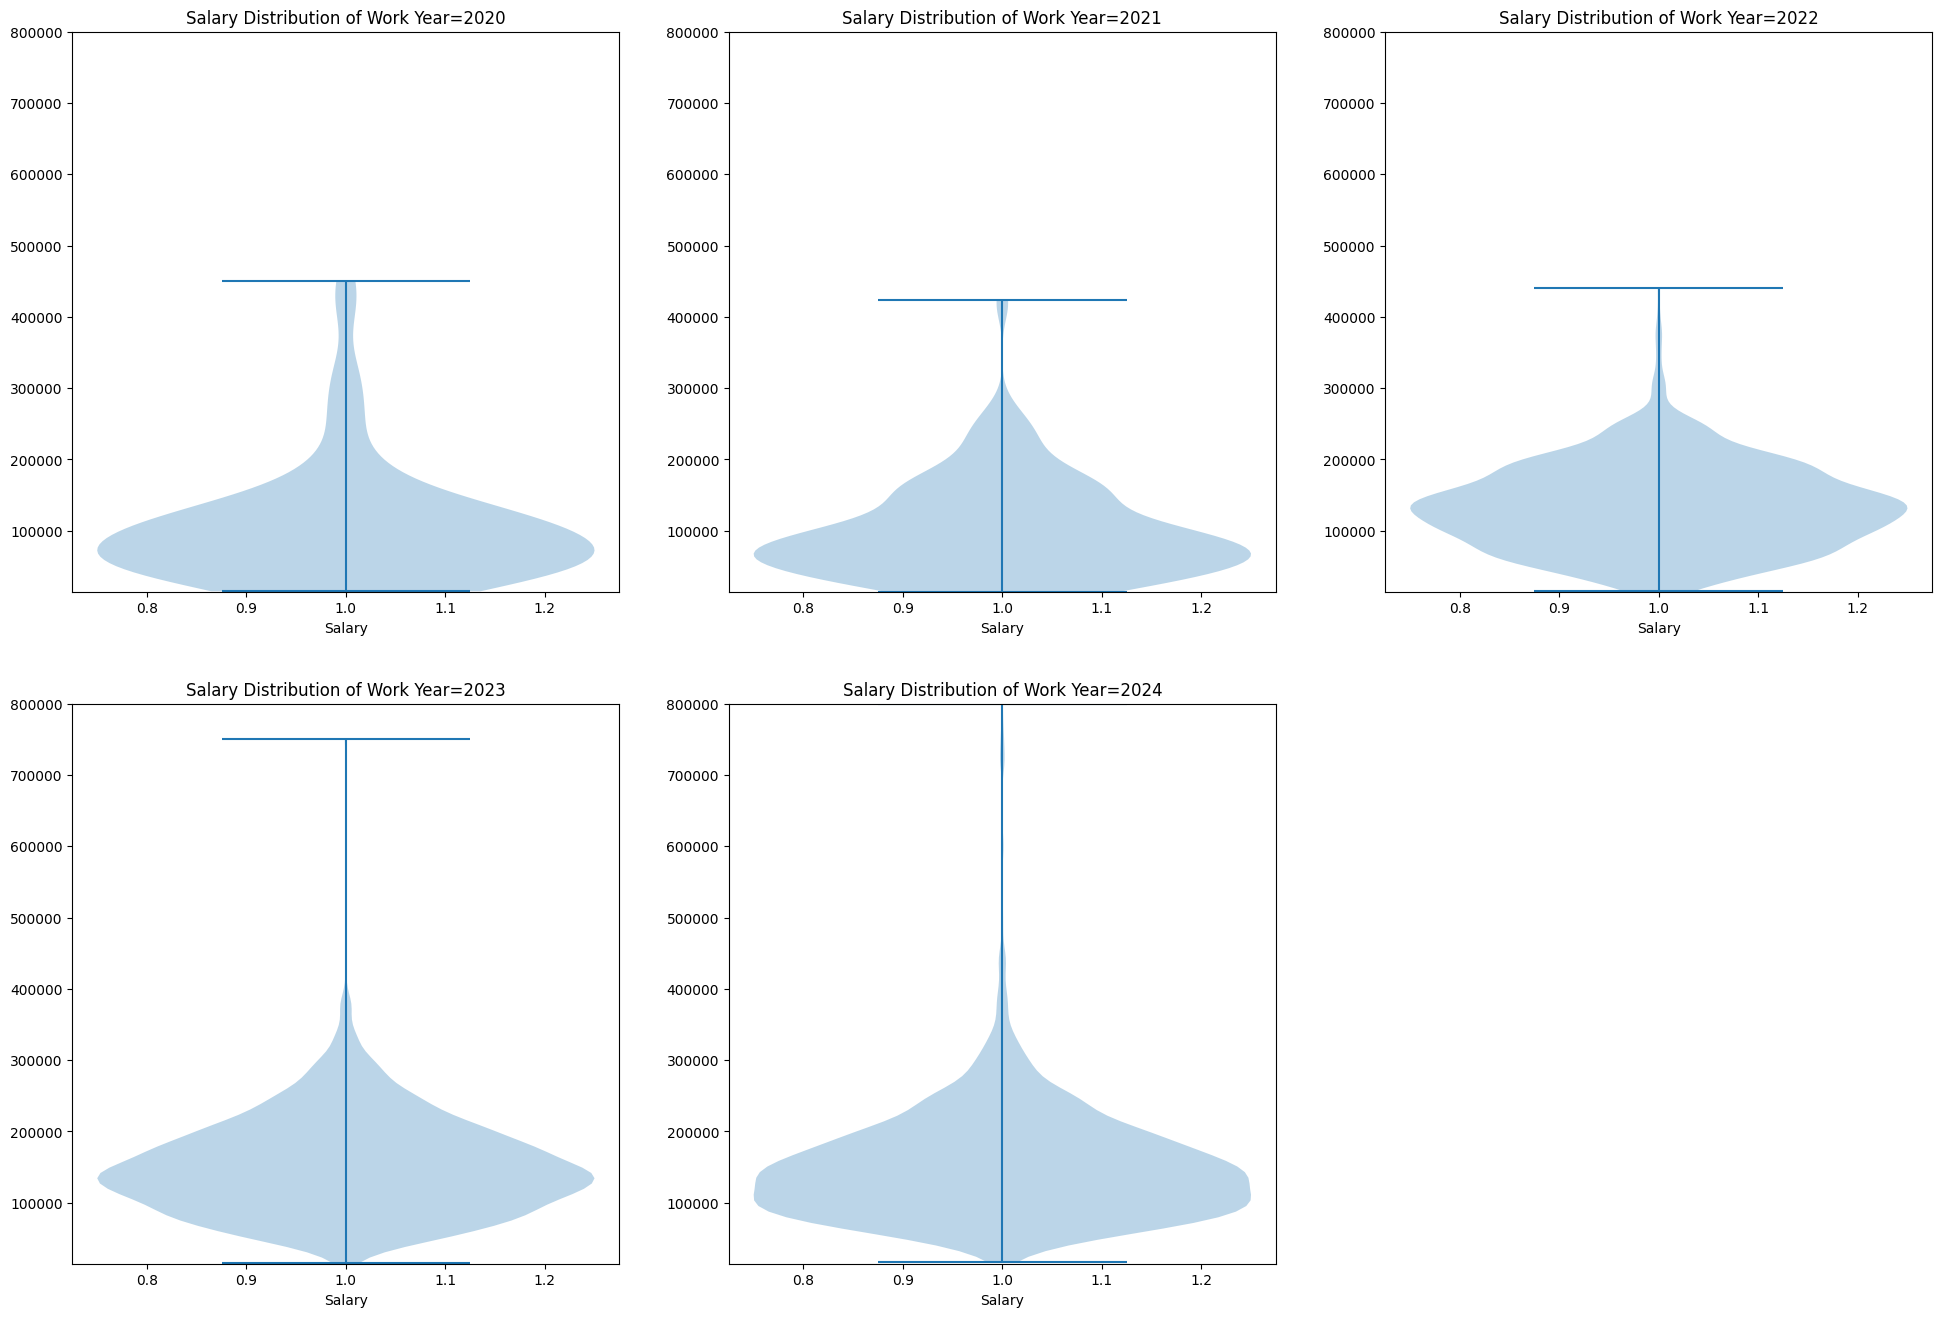

In [25]:
do_violin_plots(finalized_df, grouping_column='Work_Year', n_cols=n_cols)

#### Quantile Plot

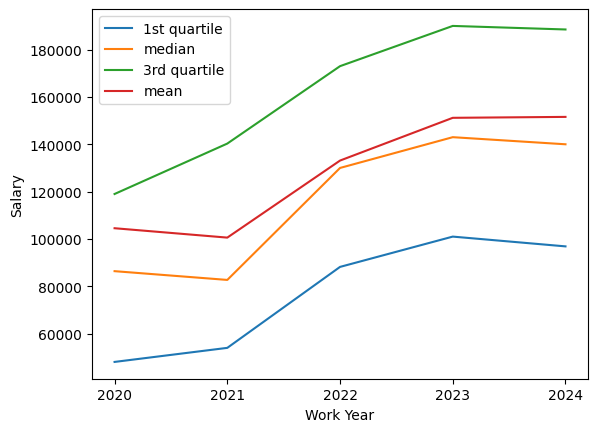

In [26]:
do_quantile_plot(finalized_df, grouping_column='Work_Year')

Having seen violin and quantile graphs, the salary of computer scientists increased from 2021 to 2023. However, in 2024, the salary of employees has been decreased for by a small margin. 

### Analysis of Employment Type

#### Histograms

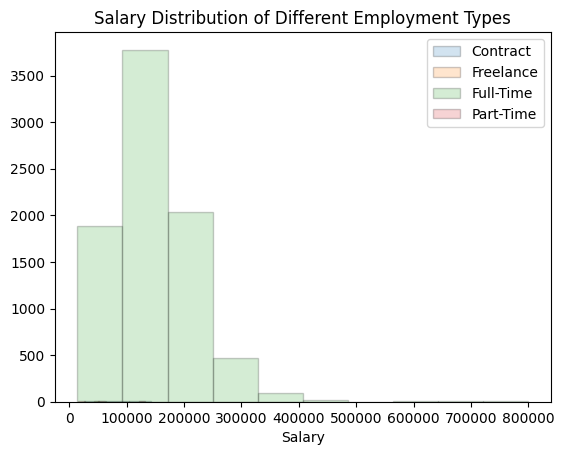

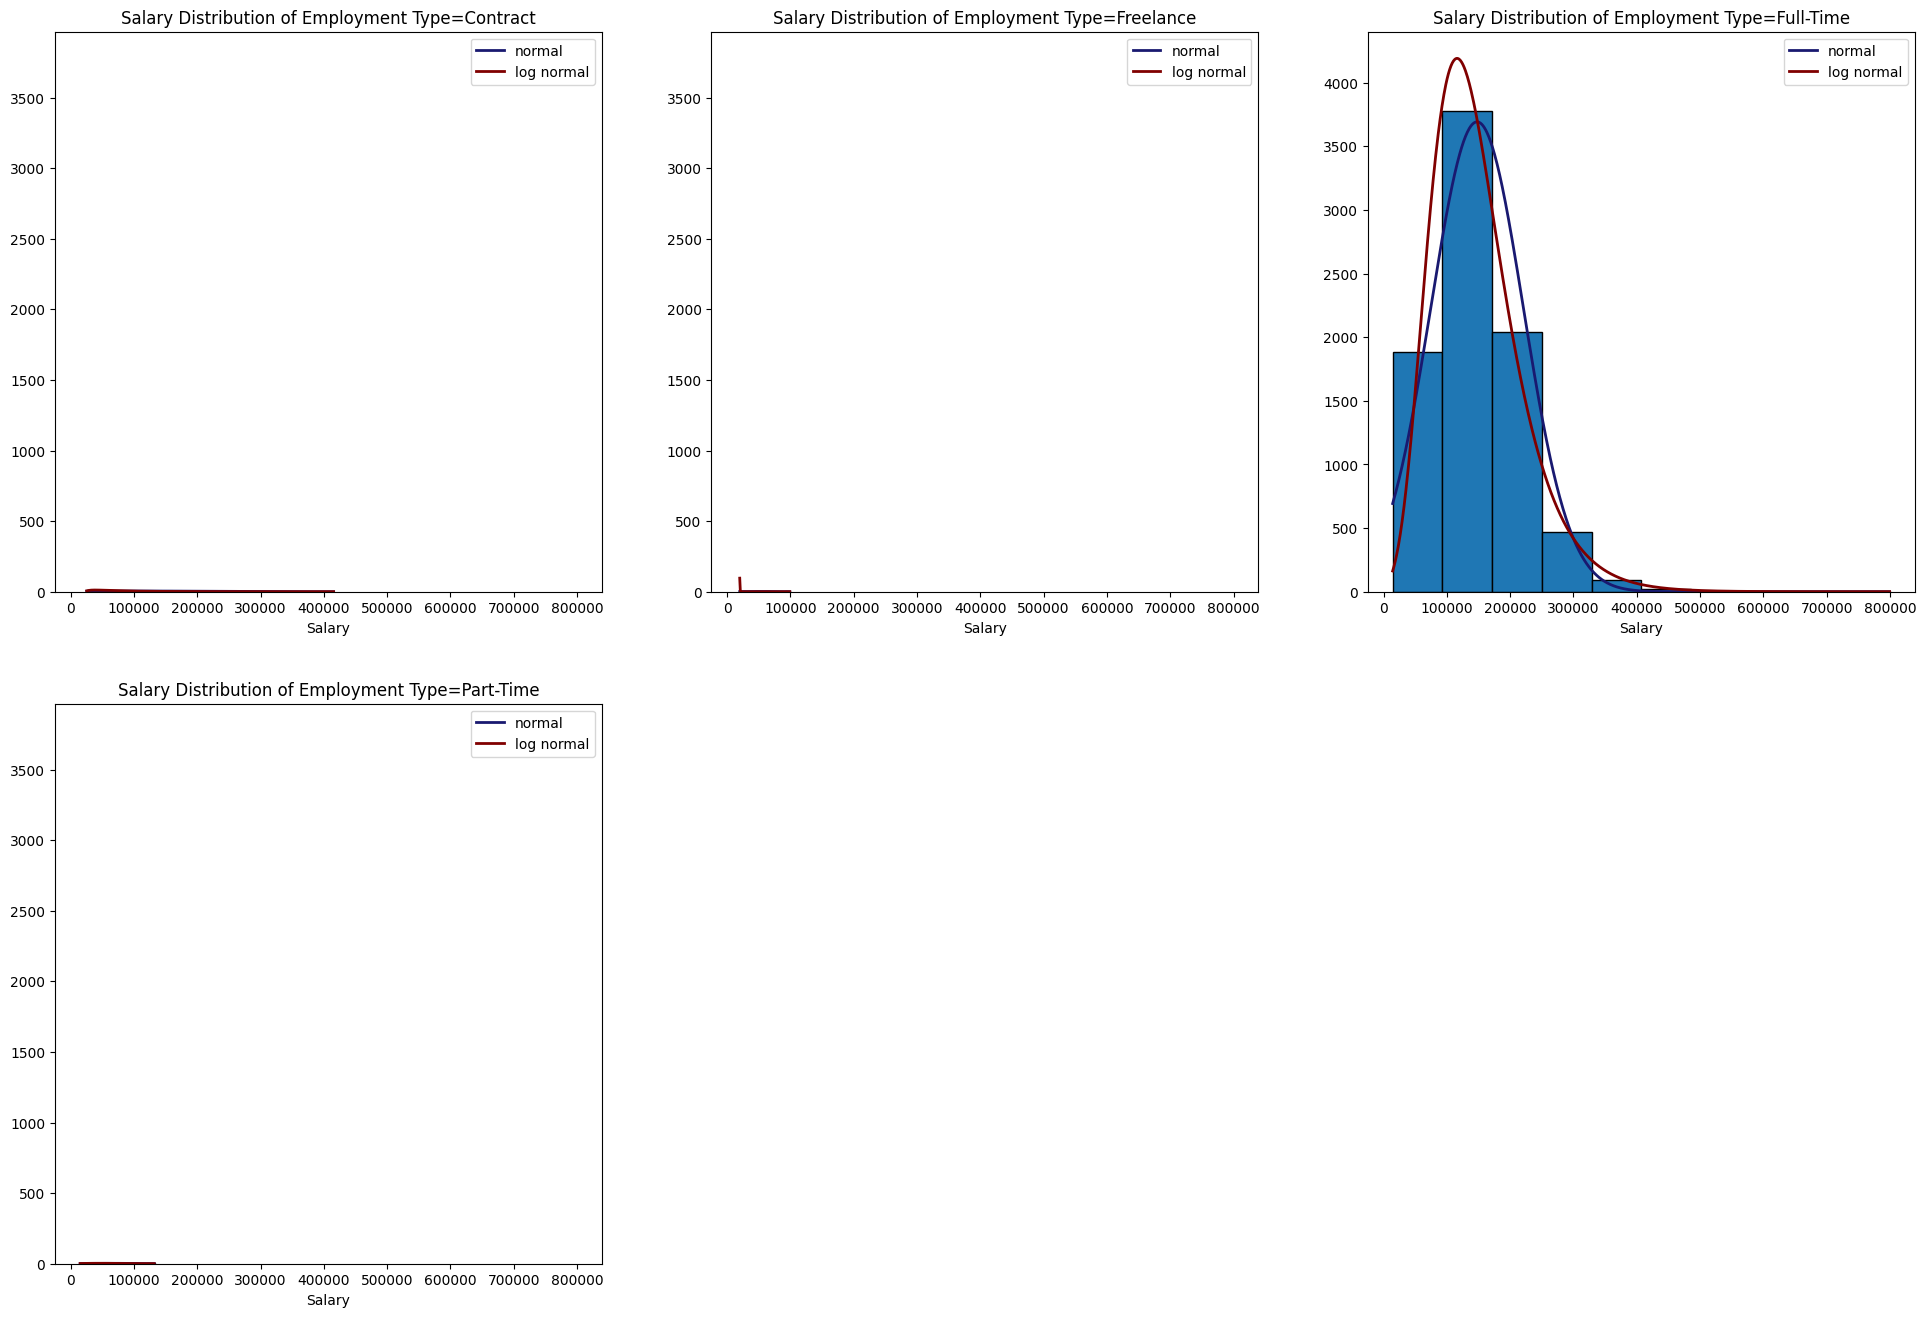

In [27]:
do_histograms(finalized_df, grouping_column='Employment_Type', n_bins=n_bins, n_cols=n_cols)

In [28]:
finalized_df['Employment_Type'].value_counts()

Employment_Type
Full-Time    8304
Contract       25
Part-Time      19
Freelance      12
Name: count, dtype: int64

Since there is not much data for other employment types, there could not be any feasible interpretation. However, since this is a course assignment, some conclusions are made in following sections.

#### Violin Plots

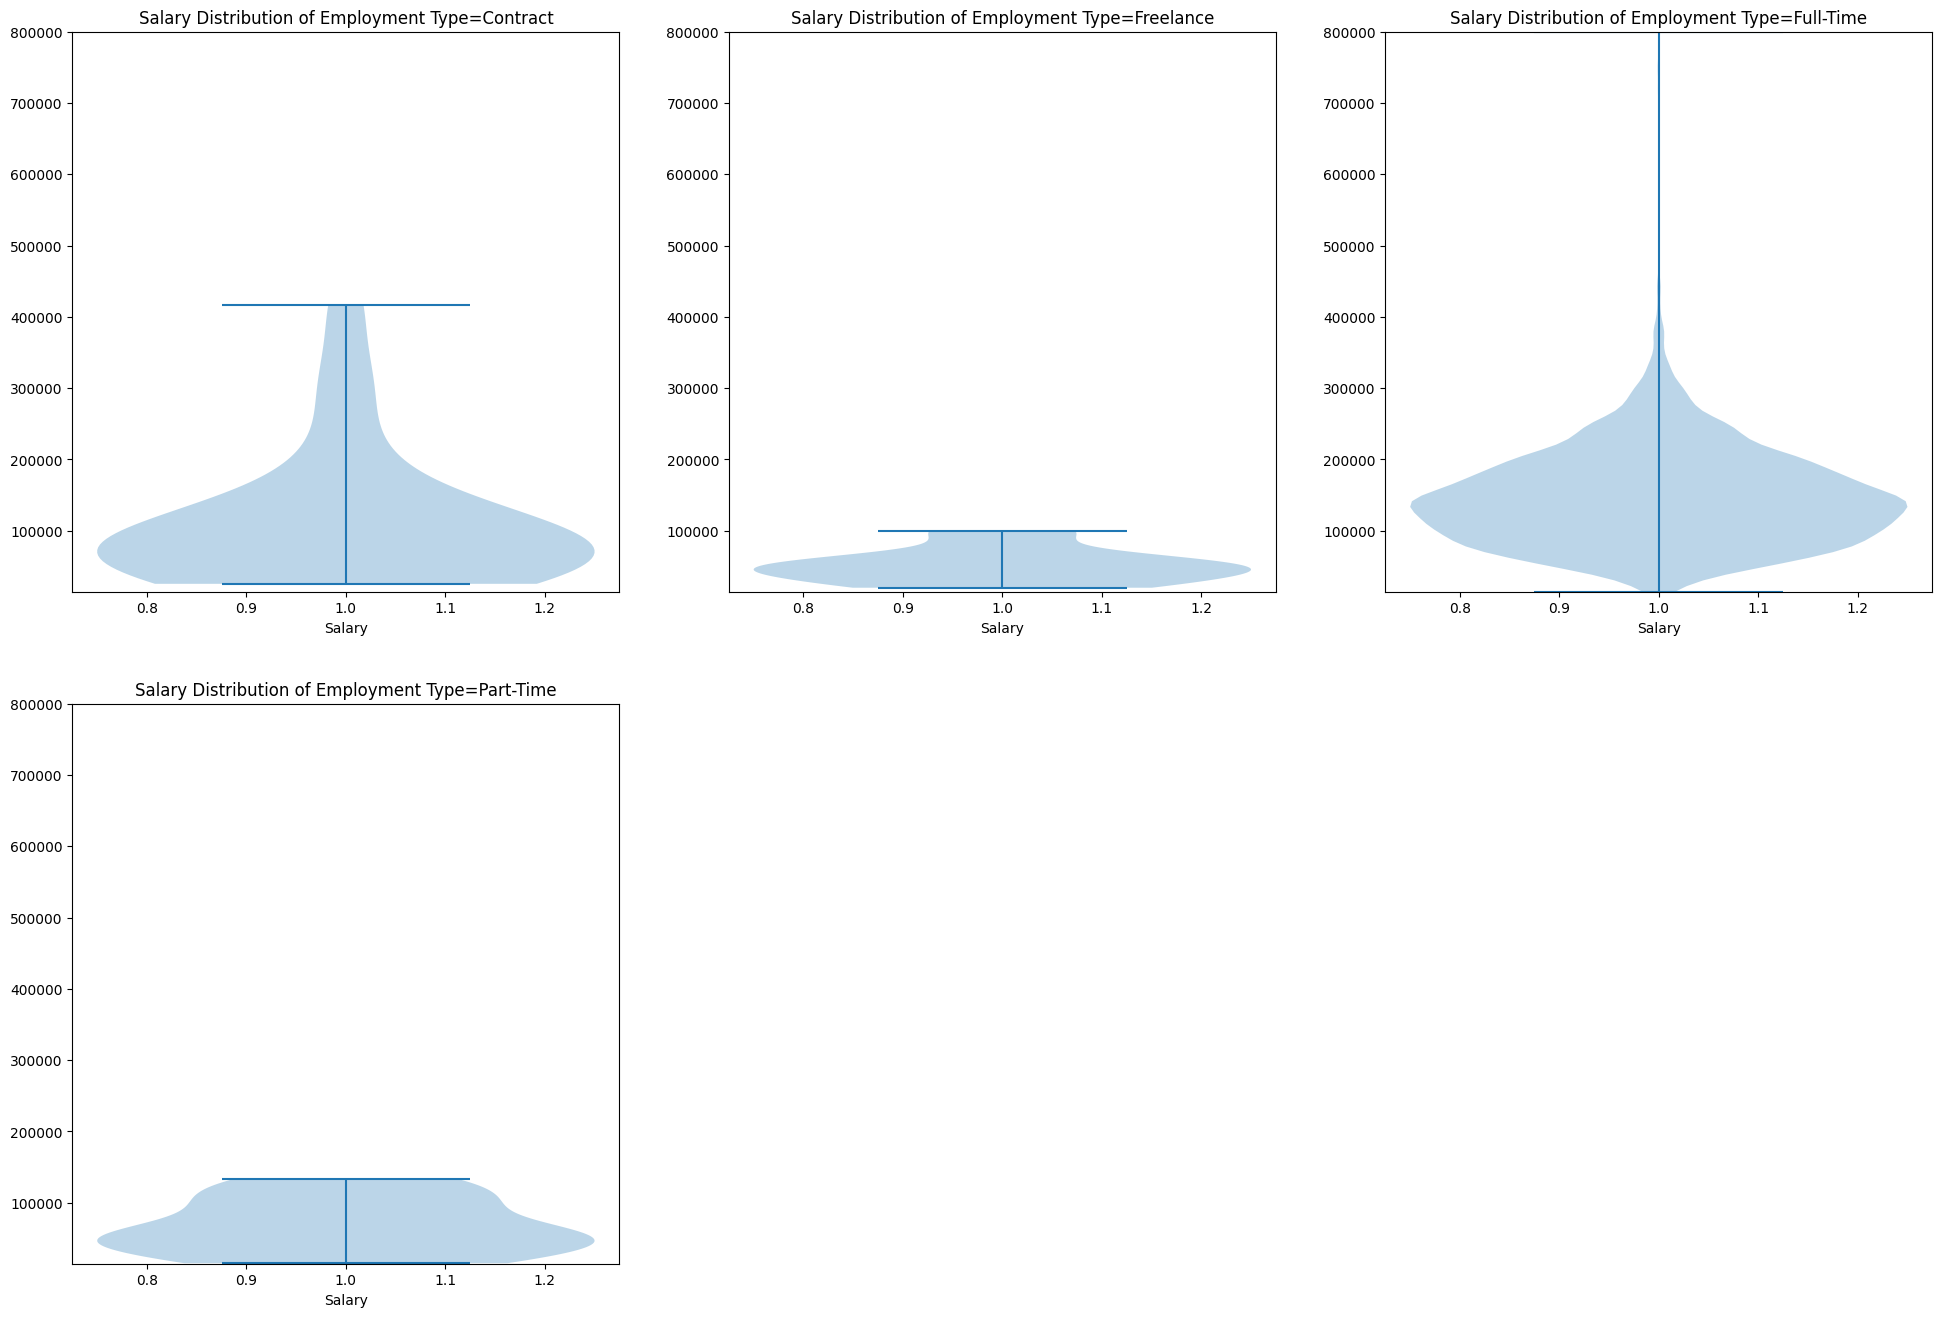

In [29]:
do_violin_plots(finalized_df, grouping_column='Employment_Type', n_cols=n_cols)

The violin plots indicate that the salary distributions for Part-Time, Full-Time, and Contract roles have a common mode, but Full-Time roles tend to have a wider spread and higher salary potential. Also, it is apparent that those who work part-time or as a freelancer have less diversity in the salary they are offered.

#### Quantile Plot

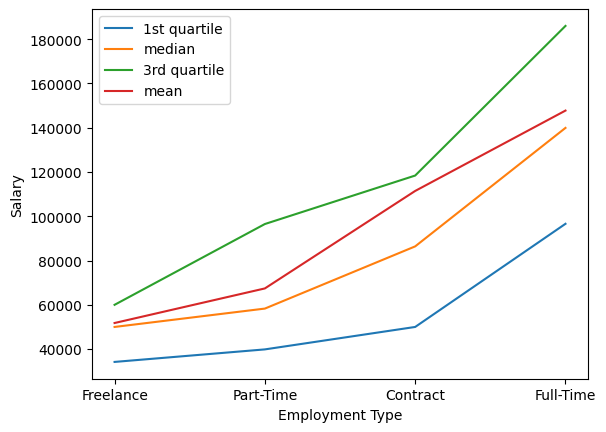

In [30]:
do_quantile_plot(finalized_df, grouping_column='Employment_Type', ordered_values=np.array(['Freelance', 'Part-Time', 'Contract', 'Full-Time']))

Full-Time employment appears to offer higher salaries and a greater range of salaries compared to Part-Time and Contract work. Freelance roles are not directly compared in the histograms but are likely to have a different pattern of salary distribution given the nature of freelance work. 

### Analysis of Company Size

#### Histograms

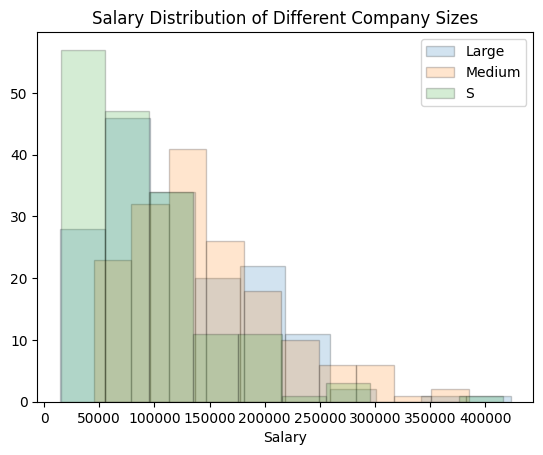

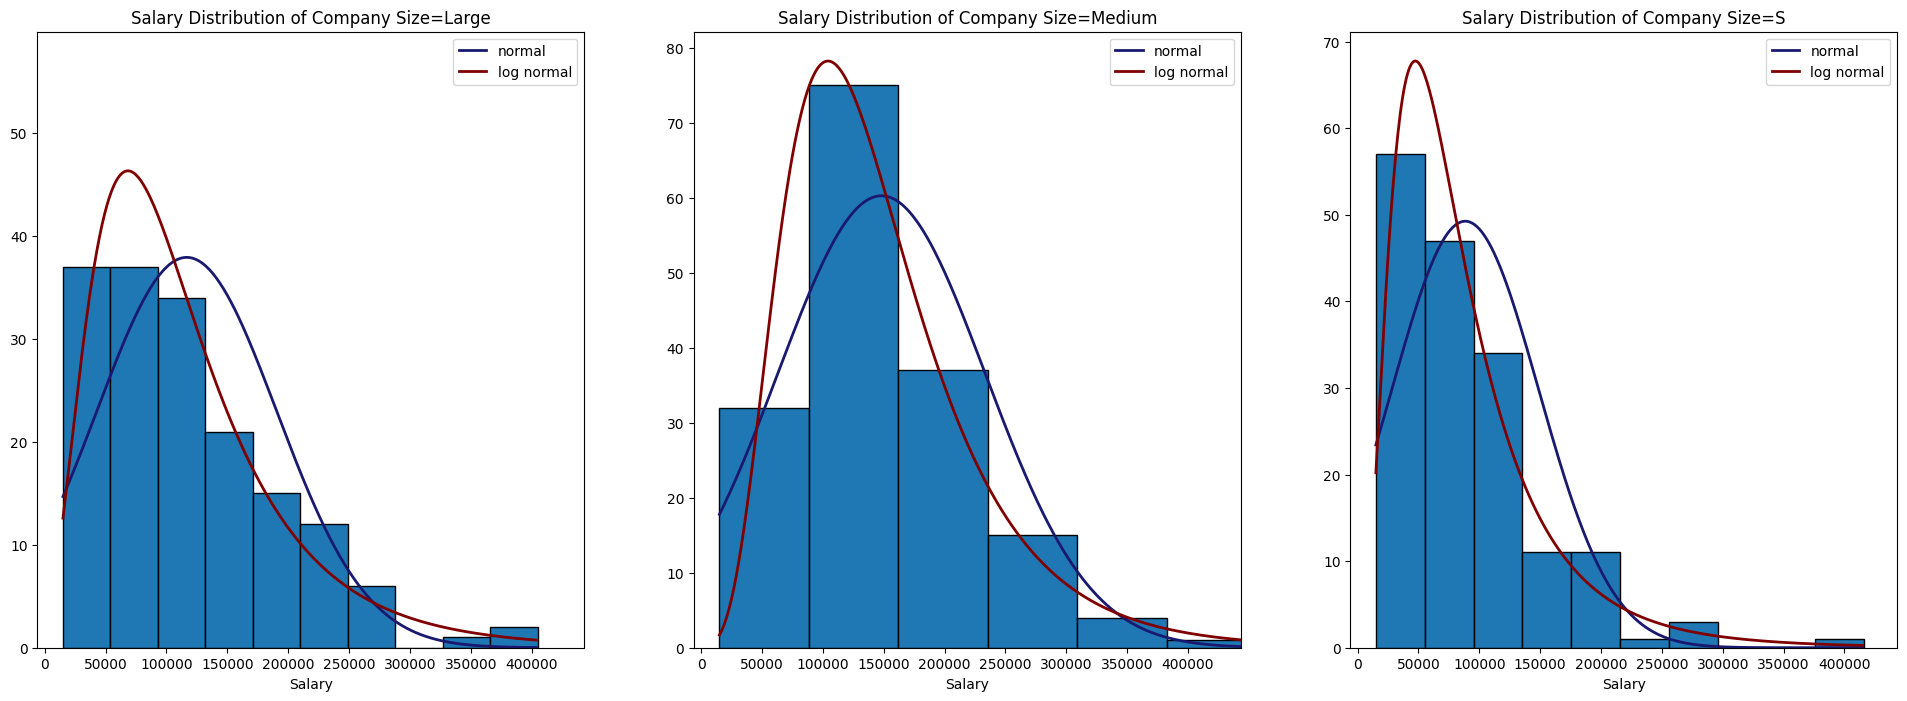

In [31]:
do_histograms(finalized_df, grouping_column='Company_Size', n_bins=n_bins, n_cols=n_cols, full=False)

In [32]:
finalized_df['Company_Size'].value_counts()

Company_Size
Medium    7610
Large      585
S          165
Name: count, dtype: int64

Based on histograms, the reader can easily observe that the peak for medium-sized companies is much higher. Also, it appears to be over more salary. Thus, it is inferrable that average salary for the employees of medium-sized companies would be higher.

#### Violin Plots

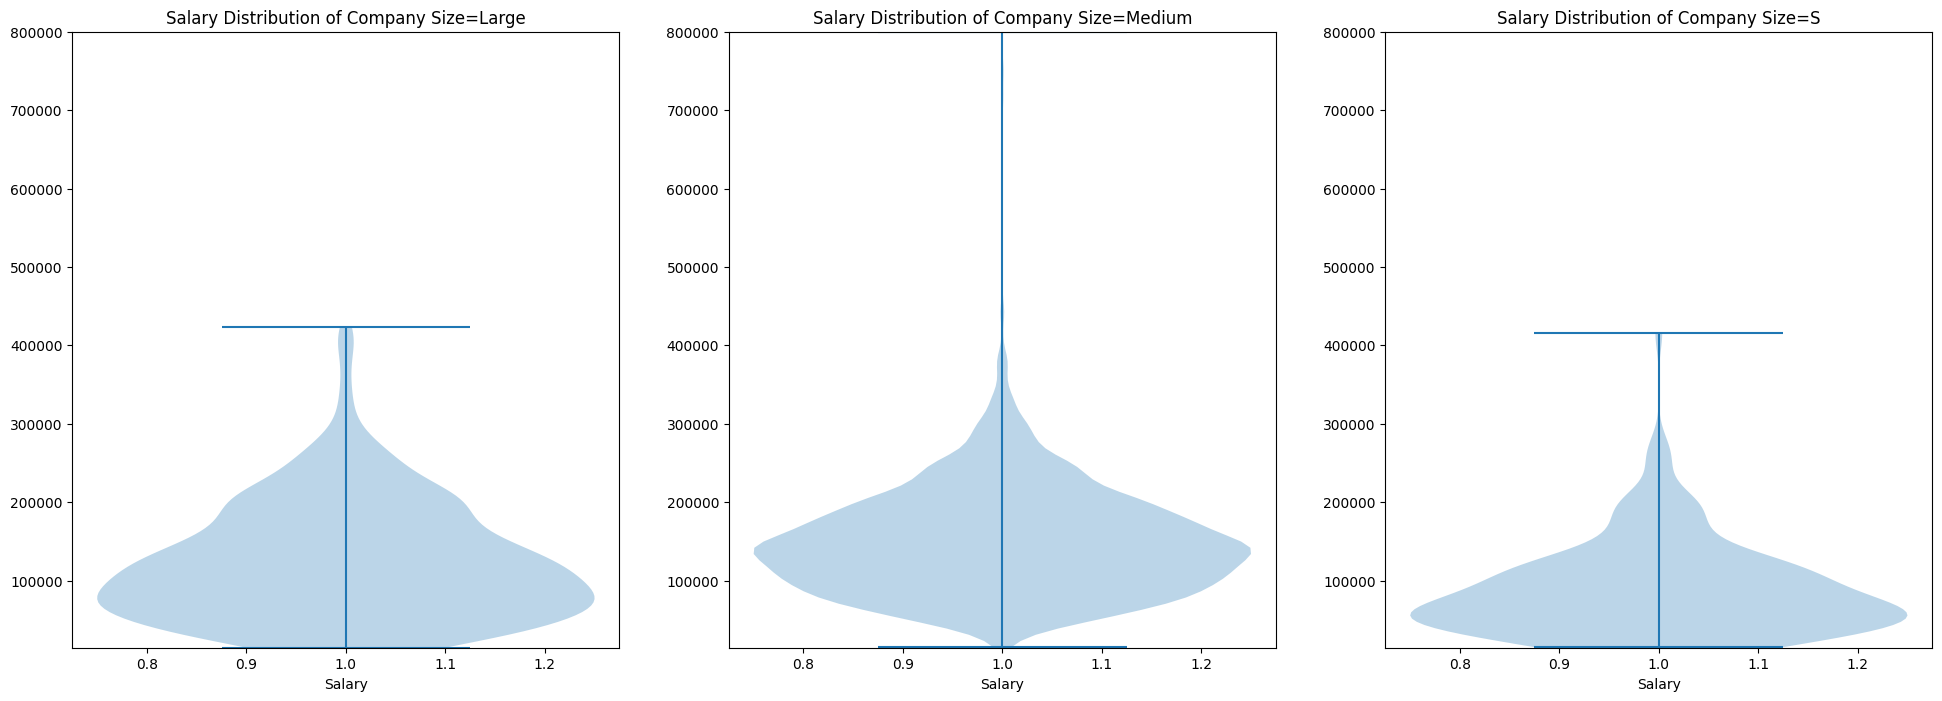

In [33]:
do_violin_plots(finalized_df, grouping_column='Company_Size', n_cols=n_cols)

This shows that larger companies have greater diversity in the salaries they offer. Also, they demostrate that small companies do not pay as much as others do with less diversity.

#### Quantile Plot

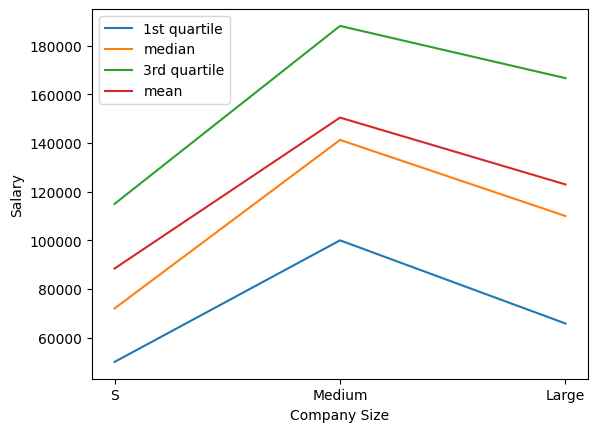

In [34]:
do_quantile_plot(finalized_df, grouping_column='Company_Size', ordered_values=np.array(['S', 'Medium', 'Large']))

On this graph, it is totally apparent that medium-sized companies offer more their employees on average in all quartiles. Then will come large companies and at last small companies are placed due to their inferior salary state.

### Analysis of Remote Ratios

#### Histograms

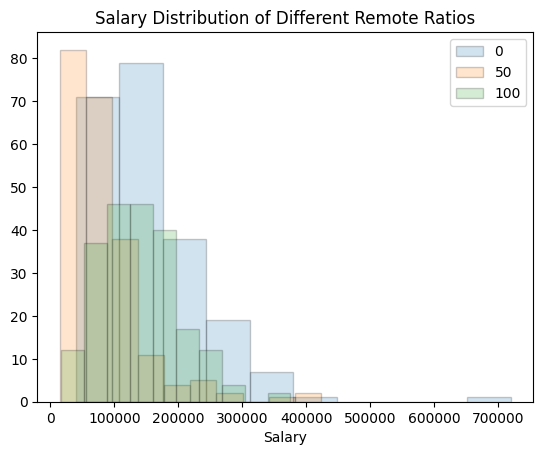

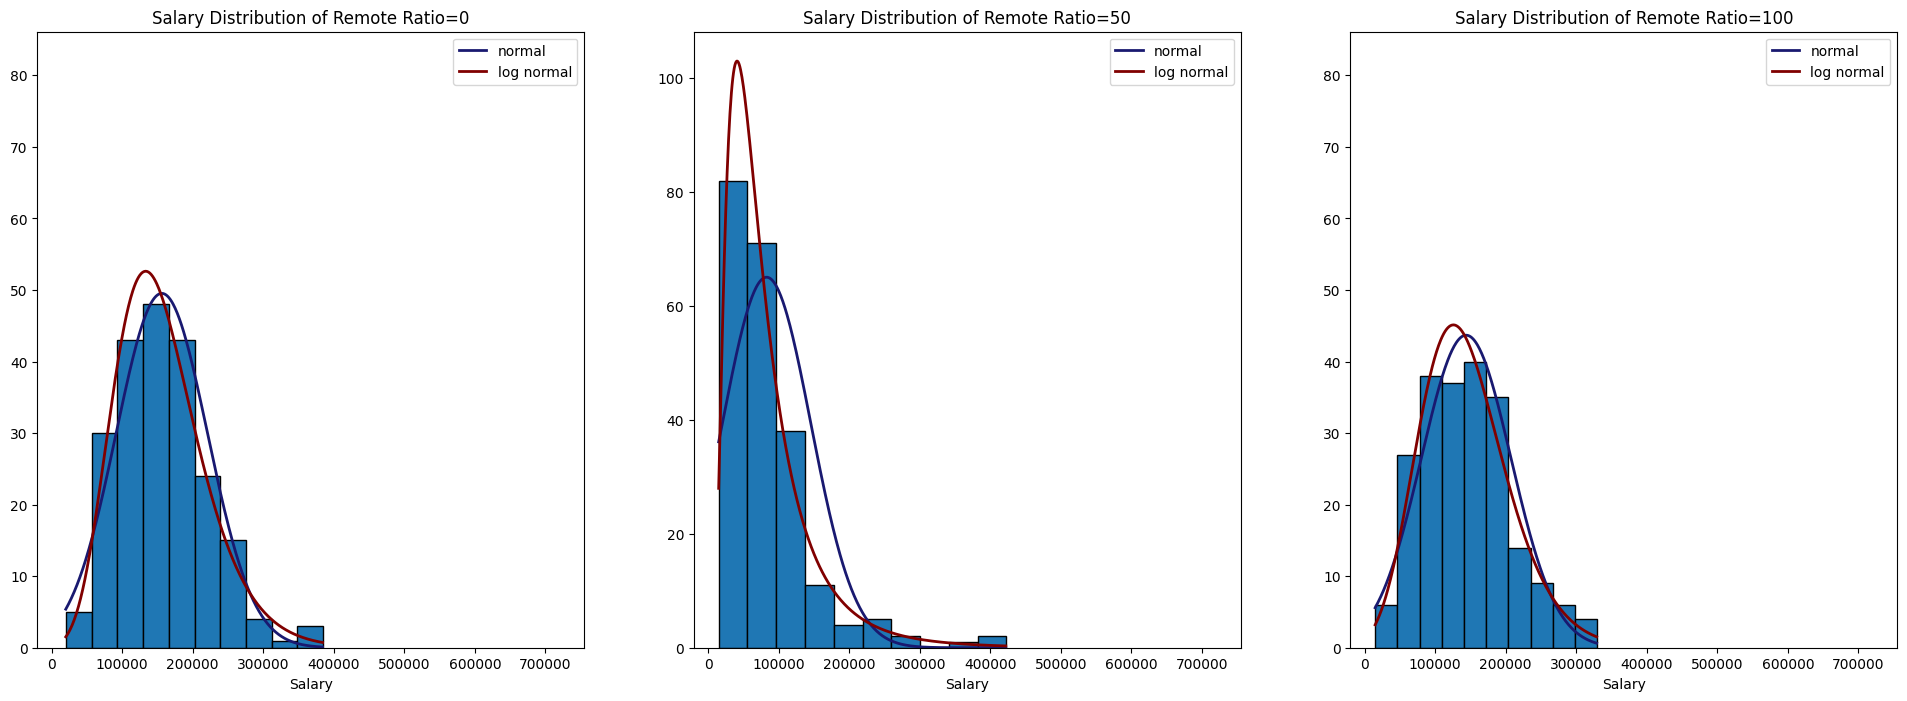

In [35]:
do_histograms(finalized_df, grouping_column='Remote_Ratio', n_bins=n_bins, n_cols=n_cols, full=False)

In [36]:
finalized_df['Remote_Ratio'].value_counts()

Remote_Ratio
0      5157
100    2987
50      216
Name: count, dtype: int64

Even though the number of employees working remotely only 50% of the time is not comparable to other two categories, this column provides nice data for interpretation. As it is shown in these graphs and in violin ones, the average salary of those who work remotely only 50% of the time are noticeably less fortunate with money they earn. It is apparent that executives are more eager to have in-person employees who are always humanly present or those who are to work remotely all the time rather than to have those who have unpredictable working hours and working presence.

#### Violin Plots

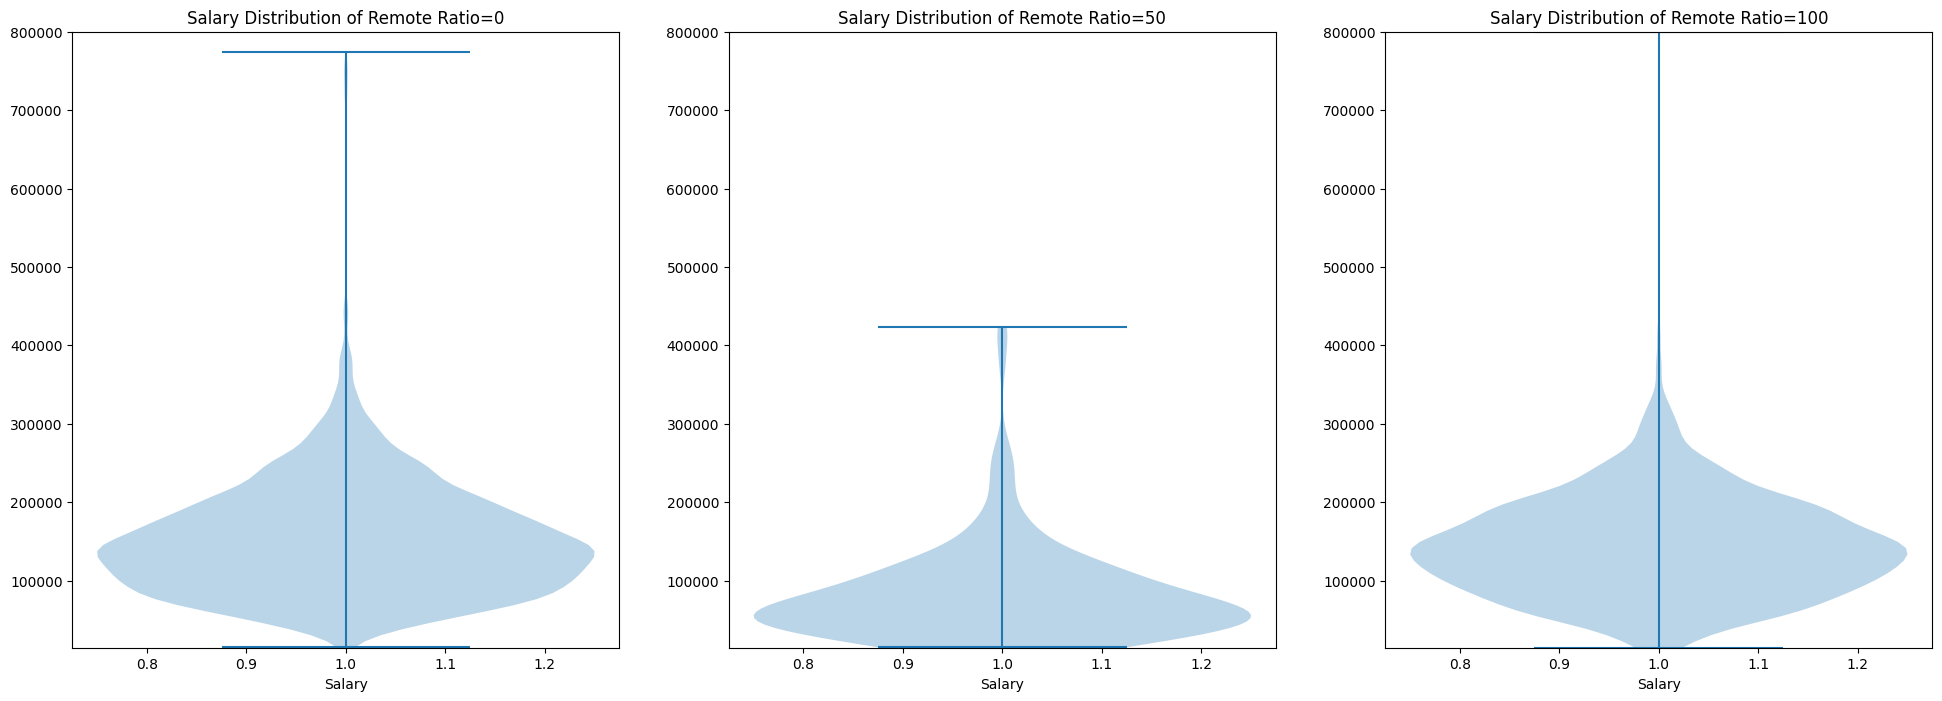

In [37]:
do_violin_plots(finalized_df, grouping_column='Remote_Ratio', n_cols=n_cols)

#### Quantile Plot

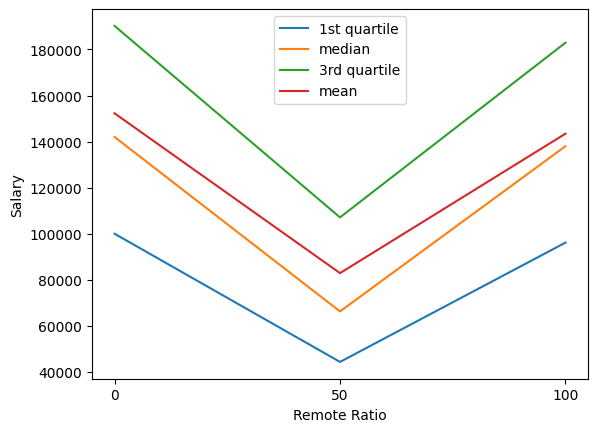

In [38]:
do_quantile_plot(finalized_df, grouping_column='Remote_Ratio')